In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings


In [37]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [38]:
df = pd.read_csv('dengue_features_train.csv')
df_label = pd.read_csv('dengue_labels_train.csv')
data = pd.merge(df, df_label, on = ['city','year','weekofyear'], how = 'left')

In [39]:
data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [41]:
data.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [42]:
sj_data = data[data['city'] == 'sj']


In [43]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   precipitation_amt_mm                   927 non-null    float64
 9   reanalysis_air_temp_k                  930 non-null    float64
 10  reanalysis_avg_temp_k                  930 non-null    float64
 11  reanal

In [44]:
sj_data['ndvi_se'] = sj_data['ndvi_se'].fillna(method = 'ffill')
sj_data['ndvi_sw'] = sj_data['ndvi_sw'].fillna(method = 'ffill')
sj_data['ndvi_ne'] = sj_data['ndvi_ne'].fillna(method = 'ffill')
sj_data['ndvi_nw'] = sj_data['ndvi_nw'].fillna(method = 'ffill')

In [45]:
sj_data['reanalysis_air_temp_k'] = sj_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_avg_temp_k'] = sj_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_dew_point_temp_k'] =sj_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_max_air_temp_k'] = sj_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
sj_data['reanalysis_min_air_temp_k'] = sj_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

In [46]:
sj_data['reanalysis_precip_amt_kg_per_m2'] = sj_data['reanalysis_precip_amt_kg_per_m2'].fillna(method='ffill')
sj_data['reanalysis_relative_humidity_percent'] = sj_data['reanalysis_relative_humidity_percent'].fillna(method='ffill')
sj_data['reanalysis_sat_precip_amt_mm'] = sj_data['reanalysis_sat_precip_amt_mm'].fillna(method='ffill')
sj_data['reanalysis_tdtr_k'] = sj_data['reanalysis_tdtr_k'].fillna(method='ffill')
sj_data['station_avg_temp_c'] = sj_data['station_avg_temp_c'].fillna(method='ffill')
sj_data['station_diur_temp_rng_c'] = sj_data['station_diur_temp_rng_c'].fillna(method='ffill')
sj_data['station_precip_mm'] = sj_data['station_precip_mm'].fillna(method='ffill')

In [47]:
sj_data['avg_reanalysis'] = sj_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

In [48]:
sj_data['avg_ndvi'] = sj_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [49]:
sj_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,avg_reanalysis,avg_ndvi
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,296.686000,0.150606
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,297.581143,0.157479
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,298.178857,0.133315
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,298.385143,0.209286
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,298.880857,0.239235


In [50]:
sj_data.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases',
       'avg_reanalysis', 'avg_ndvi'],
      dtype='object')

In [51]:
sj_data = sj_data[['week_start_date','total_cases','avg_reanalysis', 'avg_ndvi','reanalysis_relative_humidity_percent']]

In [52]:
sj_data.head()

,week_start_date,total_cases,avg_reanalysis,avg_ndvi,reanalysis_relative_humidity_percent
0,1990-04-30,4,296.686000,0.150606,73.365714
1,1990-05-07,5,297.581143,0.157479,77.368571
2,1990-05-14,4,298.178857,0.133315,82.052857
3,1990-05-21,3,298.385143,0.209286,80.337143
4,1990-05-28,6,298.880857,0.239235,80.460000


In [53]:
# !pip install Prophet

In [54]:
from prophet import Prophet

In [55]:
sj_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   week_start_date                       936 non-null    object 
 1   total_cases                           936 non-null    int64  
 2   avg_reanalysis                        936 non-null    float64
 3   avg_ndvi                              936 non-null    float64
 4   reanalysis_relative_humidity_percent  936 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 43.9+ KB


In [56]:
sj_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [57]:
# m = prophet.Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # future = m.make_future_dataframe(periods = 10)
# # forecast = m.predict(future)




In [67]:
test_df_main = pd.read_csv('dengue_features_test.csv')
test_df = test_df_main[test_df_main['city']=='sj']
test_df.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [68]:
test_df['ndvi_se'] = test_df['ndvi_se'].fillna(method = 'ffill')
test_df['ndvi_sw'] = test_df['ndvi_sw'].fillna(method = 'ffill')
test_df['ndvi_ne'] = test_df['ndvi_ne'].fillna(method = 'ffill')
test_df['ndvi_nw'] = test_df['ndvi_nw'].fillna(method = 'ffill')

test_df['reanalysis_air_temp_k'] = test_df['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_avg_temp_k'] = test_df['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_dew_point_temp_k'] =test_df['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_max_air_temp_k'] = test_df['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df['reanalysis_min_air_temp_k'] = test_df['reanalysis_min_air_temp_k'].fillna(method = 'ffill')

reanalysis_relative_humidity_percent


test_df['avg_reanalysis'] = test_df[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df['avg_ndvi'] = test_df[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [69]:
test_df = test_df[['week_start_date','avg_reanalysis', 'avg_ndvi','reanalysis_relative_humidity_percent']]

In [72]:
test_df['reanalysis_relative_humidity_percent'] = test_df['reanalysis_relative_humidity_percent'].fillna(method = 'ffill')


In [73]:
test_df.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df.head()


,ds,avg_reanalysis,avg_ndvi,reanalysis_relative_humidity_percent
0,2008-04-29,297.814000,0.039032,78.781429
1,2008-05-06,297.785714,0.030989,78.230000
2,2008-05-13,298.544286,0.057178,78.270000
3,2008-05-20,298.744286,0.057162,73.015714
4,2008-05-27,298.762286,0.058704,74.084286


In [63]:
# Set up parameter grid
import itertools
from prophet import Prophet
from prophet.diagnostics import cross_validation,performance_metrics
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('avg_ndvi')
    m.add_regressor('reanalysis_relative_humidity_percent')
    m.fit(sj_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='120 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model_sj = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model_sj.add_regressor('avg_reanalysis')
auto_model_sj.add_regressor('avg_ndvi')
auto_model_sj.add_regressor('reanalysis_relative_humidity_percent')
auto_model_sj.fit(sj_data)

14:04:31 - cmdstanpy - INFO - Chain [1] start processing
14:04:32 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] start processing
14:04:40 - cmdstanpy - INFO - Chain [1] done processing
14:04:40 - cmdstanpy - INFO - Chain [1] done processing
14:04:40 - cmdstanpy - INFO - Chain [1] done processing
14:04:40 - cmdstanpy - INFO - Chain [1] done processing
14:04:40 - cmdstanpy - INFO - Chain [1] done processing
14:04:41 - cmdstanpy - INFO - Chain [1] done pr

14:04:51 - cmdstanpy - INFO - Chain [1] done processing
14:04:51 - cmdstanpy - INFO - Chain [1] done processing
14:04:51 - cmdstanpy - INFO - Chain [1] done processing
14:04:51 - cmdstanpy - INFO - Chain [1] done processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing
14:04:52 - cmdstanpy - INFO - Chain [1] start processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing
14:04:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:04:52 - cmdstanpy - INFO - Chain [1] start processing
14:04:52 - cmdstanpy - INFO - Chain [1] start processing
14:04:52 - cmdstanpy - INFO - Chain [1] done processing
14:04:52 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:04:52 - cmdstanpy - INFO - Chain [1] start processing
14:04:52 - cmdst

14:05:00 - cmdstanpy - INFO - Chain [1] start processing
14:05:00 - cmdstanpy - INFO - Chain [1] start processing
14:05:00 - cmdstanpy - INFO - Chain [1] done processing
14:05:00 - cmdstanpy - INFO - Chain [1] done processing
14:05:01 - cmdstanpy - INFO - Chain [1] start processing
14:05:01 - cmdstanpy - INFO - Chain [1] done processing
14:05:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:01 - cmdstanpy - INFO - Chain [1] done processing
14:05:01 - cmdstanpy - INFO - Chain [1] start processing
14:05:01 - cmdstanpy - INFO - Chain [1] start processing
14:05:02 - cmdstanpy - INFO - Chain [1] done processing
14:05:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:02 - cmdstanpy - INFO - Chain [1] start processing
14:05:02 - cmdstanpy - INFO - Chain [1] done processing
14:05:02 - cmd

14:05:09 - cmdstanpy - INFO - Chain [1] start processing
14:05:09 - cmdstanpy - INFO - Chain [1] start processing
14:05:09 - cmdstanpy - INFO - Chain [1] start processing
14:05:09 - cmdstanpy - INFO - Chain [1] done processing
14:05:09 - cmdstanpy - INFO - Chain [1] done processing
14:05:09 - cmdstanpy - INFO - Chain [1] start processing
14:05:09 - cmdstanpy - INFO - Chain [1] done processing
14:05:10 - cmdstanpy - INFO - Chain [1] start processing
14:05:10 - cmdstanpy - INFO - Chain [1] done processing
14:05:10 - cmdstanpy - INFO - Chain [1] start processing
14:05:10 - cmdstanpy - INFO - Chain [1] done processing
14:05:10 - cmdstanpy - INFO - Chain [1] start processing
14:05:10 - cmdstanpy - INFO - Chain [1] done processing
14:05:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:10 - cmdstanpy - INFO - Chain [1] start processing
14:05:10 - cmdstanpy - INFO - Chain [1] start processi

14:05:24 - cmdstanpy - INFO - Chain [1] start processing
14:05:24 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing
14:05:26 - cmdstanpy - INFO - Chain [1] start processing
14:05:26 - cmdstanpy - INFO - Chain [1]

14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:50 - cmdstanpy - INFO - Chain [1] done processing
14:05:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:50 - cmdstanpy - INFO - Chain [1] done processing
14:05:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:50 - cmdstanpy - INFO - Chain [1] done processing
14:05:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:50 - cmdstanpy - INFO - Chain [1] start processing
14:05:50 - cmdstanpy - INFO - Chain [1] done processing
14:05:50 - cmdstanpy - ERROR 

14:05:58 - cmdstanpy - INFO - Chain [1] start processing
14:05:58 - cmdstanpy - INFO - Chain [1] start processing
14:05:58 - cmdstanpy - INFO - Chain [1] done processing
14:05:58 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:05:58 - cmdstanpy - INFO - Chain [1] start processing
14:05:58 - cmdstanpy - INFO - Chain [1] start processing
14:05:58 - cmdstanpy - INFO - Chain [1] done processing
14:05:58 - cmdstanpy - INFO - Chain [1] done processing
14:05:58 - cmdstanpy - INFO - Chain [1] start processing
14:05:58 - cmdstanpy - INFO - Chain [1] done processing
14:05:59 - cmdstanpy - INFO - Chain [1] done processing
14:05:59 - cmdstanpy - INFO - Chain [1] done processing
14:05:59 - cmdstanpy - INFO - Chain [1] done processing
14:05:59 - cmdstanpy - INFO - Chain [1] start processing
14:05:59 - cmdstanpy - INFO - Chain [1] done processing
14:05:59 - cmdstanpy - ERROR - Chain [1] error: error du

14:06:06 - cmdstanpy - INFO - Chain [1] start processing
14:06:07 - cmdstanpy - INFO - Chain [1] done processing
14:06:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:06:07 - cmdstanpy - INFO - Chain [1] start processing
14:06:07 - cmdstanpy - INFO - Chain [1] done processing
14:06:07 - cmdstanpy - INFO - Chain [1] start processing
14:06:07 - cmdstanpy - INFO - Chain [1] done processing
14:06:07 - cmdstanpy - INFO - Chain [1] done processing
14:06:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:06:07 - cmdstanpy - INFO - Chain [1] start processing
14:06:08 - cmdstanpy - INFO - Chain [1] start processing
14:06:08 - cmdstanpy - INFO - Chain [1] done processing
14:06:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

14:06:20 - cmdstanpy - INFO - Chain [1] done processing
14:06:20 - cmdstanpy - INFO - Chain [1] done processing
14:06:20 - cmdstanpy - INFO - Chain [1] start processing
14:06:20 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:21 - cmdstanpy - INFO - Chain [1] start processing
14:06:21 - cmdstanpy - INFO - Chain [1] done processing
14:06:22 - cmdstanpy - INFO - Chain [1] done processing
14:06:22 - cmdstanpy - INFO - Chain [1] start processing
14:06:22 - cmdstanpy - INFO - Chain [1] 

14:06:32 - cmdstanpy - INFO - Chain [1] done processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:33 - cmdstanpy - INFO - Chain [1] done processing
14:06:33 - cmdstanpy - INFO - Chain [1] done processing
14:06:33 - cmdstanpy - INFO - Chain [1] done processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:33 - cmdstanpy - INFO - Chain [1] start processing
14:06:34 - cmdstanpy - INFO - Chain [1] done processing
14:06:34 - cmdstanpy - INFO - Chain [1] done processing
14:06:34 - cmdstanpy - INFO - Chain [1] done processing
14:06:34 - cmdstanpy - INFO - Chain [1] done processing
14:06:35 - cmdstanpy - INFO - Chain [1] start processing
14:06:35 - cmdstanpy - INFO - Chain [1] start processing
14:06:35 - cmdstanpy - INFO - Chain [1]

14:06:59 - cmdstanpy - INFO - Chain [1] start processing
14:06:59 - cmdstanpy - INFO - Chain [1] done processing
14:06:59 - cmdstanpy - INFO - Chain [1] done processing
14:06:59 - cmdstanpy - INFO - Chain [1] done processing
14:07:00 - cmdstanpy - INFO - Chain [1] done processing
14:07:00 - cmdstanpy - INFO - Chain [1] start processing
14:07:00 - cmdstanpy - INFO - Chain [1] done processing
14:07:00 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:07:00 - cmdstanpy - INFO - Chain [1] start processing
14:07:00 - cmdstanpy - INFO - Chain [1] start processing
14:07:00 - cmdstanpy - INFO - Chain [1] start processing
14:07:01 - cmdstanpy - INFO - Chain [1] done processing
14:07:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:07:01 - cmdstanpy - INFO - Chain [1] done processing
14:07:01 - cmds

14:07:11 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - INFO - Chain [1] start processing
14:07:11 - cmdstanpy - INFO - Chain [1] start processing
14:07:11 - cmdstanpy - INFO - Chain [1] start processing
14:07:11 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:07:11 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
14:07:11 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
14:07:11 - cmdstanpy - INFO - Chain [1] done processing
14:07:11 - cmdstanpy - INFO - C

14:07:23 - cmdstanpy - INFO - Chain [1] start processing
14:07:23 - cmdstanpy - INFO - Chain [1] done processing
14:07:24 - cmdstanpy - INFO - Chain [1] done processing
14:07:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:07:24 - cmdstanpy - INFO - Chain [1] start processing
14:07:24 - cmdstanpy - INFO - Chain [1] start processing
14:07:24 - cmdstanpy - INFO - Chain [1] done processing
14:07:24 - cmdstanpy - INFO - Chain [1] start processing
14:07:24 - cmdstanpy - INFO - Chain [1] start processing
14:07:24 - cmdstanpy - INFO - Chain [1] done processing
14:07:24 - cmdstanpy - INFO - Chain [1] done processing
14:07:24 - cmdstanpy - INFO - Chain [1] start processing
14:07:24 - cmdstanpy - INFO - Chain [1] done processing
14:07:25 - cmdstanpy - INFO - Chain [1] done processing
14:07:25 - cmdstanpy - INFO - Chain [1] start processing
14:07:25 - cmdstanpy - INFO - Chain [1] start processin

14:07:40 - cmdstanpy - INFO - Chain [1] start processing
14:07:40 - cmdstanpy - INFO - Chain [1] start processing
14:07:40 - cmdstanpy - INFO - Chain [1] start processing
14:07:40 - cmdstanpy - INFO - Chain [1] done processing
14:07:40 - cmdstanpy - INFO - Chain [1] done processing
14:07:40 - cmdstanpy - INFO - Chain [1] start processing
14:07:40 - cmdstanpy - INFO - Chain [1] done processing
14:07:40 - cmdstanpy - INFO - Chain [1] done processing
14:07:41 - cmdstanpy - INFO - Chain [1] start processing
14:07:41 - cmdstanpy - INFO - Chain [1] start processing
14:07:41 - cmdstanpy - INFO - Chain [1] done processing
14:07:41 - cmdstanpy - INFO - Chain [1] done processing
14:07:41 - cmdstanpy - INFO - Chain [1] start processing
14:07:41 - cmdstanpy - INFO - Chain [1] done processing
14:07:42 - cmdstanpy - INFO - Chain [1] start processing
14:07:42 - cmdstanpy - INFO - Chain [1] start processing
14:07:42 - cmdstanpy - INFO - Chain [1] start processing
14:07:42 - cmdstanpy - INFO - Chain [1

14:07:53 - cmdstanpy - INFO - Chain [1] done processing
14:07:53 - cmdstanpy - INFO - Chain [1] done processing
14:07:53 - cmdstanpy - INFO - Chain [1] done processing
14:07:54 - cmdstanpy - INFO - Chain [1] start processing
14:07:54 - cmdstanpy - INFO - Chain [1] done processing
14:07:54 - cmdstanpy - INFO - Chain [1] start processing
14:07:54 - cmdstanpy - INFO - Chain [1] start processing
14:07:54 - cmdstanpy - INFO - Chain [1] done processing
14:07:54 - cmdstanpy - INFO - Chain [1] done processing
14:07:56 - cmdstanpy - INFO - Chain [1] start processing
14:07:56 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
14:08:04 - cmdstanpy - INFO - Chain [1] start processing
14:08:04 - cmdstanpy - INFO - Chain [1] start processing
14:08:04 - cmdstanpy - INFO - Chain [1] start processing
14:08:04 - cmdstanpy - INFO - Chain [1] start processing
14:08:04 - cmdstanpy - INFO - Chain [1] start pr

14:08:17 - cmdstanpy - INFO - Chain [1] start processing
14:08:17 - cmdstanpy - INFO - Chain [1] done processing
14:08:17 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:08:17 - cmdstanpy - INFO - Chain [1] start processing
14:08:18 - cmdstanpy - INFO - Chain [1] done processing
14:08:18 - cmdstanpy - INFO - Chain [1] done processing
14:08:18 - cmdstanpy - INFO - Chain [1] start processing
14:08:18 - cmdstanpy - INFO - Chain [1] done processing
14:08:18 - cmdstanpy - INFO - Chain [1] done processing
14:08:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:08:18 - cmdstanpy - INFO - Chain [1] start processing
14:08:18 - cmdstanpy - INFO - Chain [1] done processing
14:08:18 - cmdstanpy - INFO - Chain [1] start processing
14:08:18 - cmdstanpy - INFO - Chain [1] done processing
14:08:18 - cmds

14:08:27 - cmdstanpy - INFO - Chain [1] done processing
14:08:27 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:08:27 - cmdstanpy - INFO - Chain [1] start processing
14:08:28 - cmdstanpy - INFO - Chain [1] start processing
14:08:28 - cmdstanpy - INFO - Chain [1] start processing
14:08:28 - cmdstanpy - INFO - Chain [1] done processing
14:08:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:08:28 - cmdstanpy - INFO - Chain [1] start processing
14:08:28 - cmdstanpy - INFO - Chain [1] done processing
14:08:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:08:28 - cmdstanpy - INFO - Chain [1] start processing
14:08:28 - cmdstanpy - INFO - Chain [1] start processing
14:08:28 - cmdstanpy - INFO 

14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] done processing
14:08:41 - cmdstanpy - INFO - Chain [1] done processing
14:08:41 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] done processing
14:08:41 - cmdstanpy - INFO - Chain [1] start processing
14:08:41 - cmdstanpy - INFO - Chain [1] done processing
14:08:42 - cmdstanpy - INFO - Chain [1] start processing
14:08:42 - cmdstanpy - INFO - Chain [1] start processing
14:08:42 - cmdstanpy - INFO - Chain [1] done processing
14:08:42 - cmdstanpy - INFO - Chain [1] start process

14:08:54 - cmdstanpy - INFO - Chain [1] start processing
14:08:54 - cmdstanpy - INFO - Chain [1] done processing
14:08:54 - cmdstanpy - INFO - Chain [1] done processing
14:08:54 - cmdstanpy - INFO - Chain [1] done processing
14:08:54 - cmdstanpy - INFO - Chain [1] start processing
14:08:54 - cmdstanpy - INFO - Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
14:08:55 - cmdstanpy - INFO - Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
14:08:55 - cmdstanpy - INFO - Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
14:08:55 - cmdstanpy - INFO - Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] start processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
14:08:55 - cmdstanpy - INFO - Chain [1] done processing
14:08:55 - cmdstanpy - INFO - Chain [1] 

14:09:24 - cmdstanpy - INFO - Chain [1] done processing
14:09:24 - cmdstanpy - INFO - Chain [1] start processing
14:09:24 - cmdstanpy - INFO - Chain [1] done processing
14:09:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:09:24 - cmdstanpy - INFO - Chain [1] start processing
14:09:24 - cmdstanpy - INFO - Chain [1] done processing
14:09:24 - cmdstanpy - INFO - Chain [1] done processing
14:09:24 - cmdstanpy - INFO - Chain [1] start processing
14:09:24 - cmdstanpy - INFO - Chain [1] done processing
14:09:24 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:09:24 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] start processing
14:09:25 - cmdstanpy - INFO - Chain [1] done processing
14:09:25 - cmdstanpy - INFO - Chain [1] done processing
14:09:25 - cmds

14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:34 - cmdstanpy - INFO - Chain [1] done processing
14:09:34 - cmdstanpy - INFO - Chain [1] start processing
14:09:35 - cmdstanpy - INFO - Chain [1] done processing
14:09:35 - cmdstanpy - INFO - Chain [1] done processing
14:09:35 - cmdstanpy - INFO - Chain [1] start processing
14:09:35 - cmdstanpy - INFO - Chain [1] done processing
14:09:35 - cmdstanpy - INFO - Chain [1] done processing
14:09:35 - cmdstanpy - INFO - Chain [1] done processing
14:09:35 - cmdstanpy - INFO - Chain [1] done processing
14:09:35 - cmdstanpy - ERROR - Chain [1] error: error dur

14:09:43 - cmdstanpy - INFO - Chain [1] done processing
14:09:43 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:09:43 - cmdstanpy - INFO - Chain [1] start processing
14:09:43 - cmdstanpy - INFO - Chain [1] done processing
14:09:43 - cmdstanpy - INFO - Chain [1] done processing
14:09:43 - cmdstanpy - INFO - Chain [1] done processing
14:09:44 - cmdstanpy - INFO - Chain [1] start processing
14:09:44 - cmdstanpy - INFO - Chain [1] done processing
14:09:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:09:44 - cmdstanpy - INFO - Chain [1] start processing
14:09:44 - cmdstanpy - INFO - Chain [1] start processing
14:09:44 - cmdstanpy - INFO - Chain [1] done processing
14:09:44 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally

14:09:56 - cmdstanpy - INFO - Chain [1] start processing
14:09:56 - cmdstanpy - INFO - Chain [1] start processing
14:09:56 - cmdstanpy - INFO - Chain [1] start processing
14:09:56 - cmdstanpy - INFO - Chain [1] done processing
14:09:56 - cmdstanpy - INFO - Chain [1] done processing
14:09:56 - cmdstanpy - INFO - Chain [1] start processing
14:09:56 - cmdstanpy - INFO - Chain [1] done processing
14:09:56 - cmdstanpy - INFO - Chain [1] done processing
14:09:56 - cmdstanpy - INFO - Chain [1] start processing
14:09:57 - cmdstanpy - INFO - Chain [1] done processing
14:09:57 - cmdstanpy - INFO - Chain [1] start processing
14:09:57 - cmdstanpy - INFO - Chain [1] done processing
14:09:57 - cmdstanpy - INFO - Chain [1] start processing
14:09:57 - cmdstanpy - INFO - Chain [1] start processing
14:09:57 - cmdstanpy - INFO - Chain [1] done processing
14:09:57 - cmdstanpy - INFO - Chain [1] done processing
14:09:57 - cmdstanpy - INFO - Chain [1] start processing
14:09:57 - cmdstanpy - INFO - Chain [1]

14:10:21 - cmdstanpy - INFO - Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
14:10:21 - cmdstanpy - INFO - Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
14:10:21 - cmdstanpy - INFO - Chain [1] start processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
14:10:21 - cmdstanpy - INFO - Chain [1] done processing
14:10:22 - cmdstanpy - INFO - Chain [1] start processing
14:10:22 - cmdstanpy - INFO - Chain [1] done processing
14:10:23 - cmdstanpy - INFO - Chain [1] start processing
14:10:23 - cmdstanpy - INFO - Chain [1] start processing
14:10:23 - cmdstanpy - INFO - Chain [1] start processing
14:10:23 - cmdstanpy - INFO - Chain [1

14:10:49 - cmdstanpy - INFO - Chain [1] done processing
14:10:49 - cmdstanpy - INFO - Chain [1] done processing
14:10:49 - cmdstanpy - INFO - Chain [1] start processing
14:10:49 - cmdstanpy - INFO - Chain [1] done processing
14:10:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:10:49 - cmdstanpy - INFO - Chain [1] start processing
14:10:49 - cmdstanpy - INFO - Chain [1] start processing
14:10:49 - cmdstanpy - INFO - Chain [1] done processing
14:10:49 - cmdstanpy - INFO - Chain [1] start processing
14:10:49 - cmdstanpy - INFO - Chain [1] done processing
14:10:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:10:49 - cmdstanpy - INFO - Chain [1] start processing
14:10:49 - cmdstanpy - INFO - Chain [1] done processing
14:10:49 - cmdstanpy - ERROR - Chain [1] error: error during processing

14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:58 - cmdstanpy - INFO - Chain [1] done processing
14:10:59 - cmdstanpy - INFO - Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing
14:10:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:10:59 - cmdstanpy - INFO - Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing
14:10:59 - cmdstanpy - INFO - Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing
14:10:59 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:10:59 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmdstanpy - INFO - Chain [1] done processing
14:11:00 - cmdstanpy - INFO - Chain [1] start processing
14:11:00 - cmds

14:11:10 - cmdstanpy - INFO - Chain [1] start processing
14:11:10 - cmdstanpy - INFO - Chain [1] done processing
14:11:10 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:11:10 - cmdstanpy - INFO - Chain [1] done processing
14:11:10 - cmdstanpy - INFO - Chain [1] start processing
14:11:10 - cmdstanpy - INFO - Chain [1] start processing
14:11:10 - cmdstanpy - INFO - Chain [1] done processing
14:11:10 - cmdstanpy - INFO - Chain [1] start processing
14:11:11 - cmdstanpy - INFO - Chain [1] done processing
14:11:11 - cmdstanpy - INFO - Chain [1] start processing
14:11:11 - cmdstanpy - INFO - Chain [1] done processing
14:11:11 - cmdstanpy - INFO - Chain [1] start processing
14:11:11 - cmdstanpy - INFO - Chain [1] start processing
14:11:11 - cmdstanpy - INFO - Chain [1] done processing
14:11:11 - cmdstanpy - INFO - Chain [1] done processing
14:11:11 - cmdstanpy - INFO - Chain [1] start processin

14:11:21 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] done processing
14:11:22 - cmdstanpy - INFO - Chain [1] start processing
14:11:23 - cmdstanpy - INFO - Chain [1]

14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] start processing
14:11:37 - cmdstanpy - INFO - Chain [1] done processing
14:11:38 - cmdstanpy - INFO - Chain [1] start processing
14:11:38 - cmdstanpy - INFO - Chain [1] done processing
14:11:38 - cmdstanpy - INFO - Chain [1] done processing
14:11:38 - cmdstanpy - INFO - Chain [1] start processing
14:11:38 - cmdstanpy - INFO - Chain [1] done processing
14:11:39 - cmdstanpy - INFO - Chain [1] start processing
14:11:39 - cmdstanpy - INFO - Chain [1] done processing
14:11:42 - cmdstanpy - INFO - Chain [1] start processing
14:11:43 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
14:11:53 - cmdstanpy - INFO - Chain [1] start processing
14:11:53 - cmdstanpy - INFO - Chain [1] start processing
14:11:53 - cmdstanpy - INFO - Chain [1] start pr

14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:04 - cmdstanpy - INFO - Chain [1] done processing
14:12:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:12:04 - cmdstanpy - INFO - Chain [1] start processing
14:12:05 - cmdstanpy - INFO - Chain [1] start processing
14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:12:05 - cmdstanpy - INFO - Chain [1] start processing
14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:05 - cmdstanpy - INFO - Chain [1] done processing
14:12:06 - cmds

14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:14 - cmdstanpy - INFO - Chain [1] done processing
14:12:14 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:12:14 - cmdstanpy - INFO - Chain [1] start processing
14:12:15 - cmdstanpy - INFO - Chain [1] start processing
14:12:15 - cmdstanpy - INFO - Chain [1] start processing
14:12:15 - cmdstanpy - INFO - Chain [1] start processing
14:12:15 - cmdstanpy - INFO - Chain [1] start processing
14:12:15 - cmdstanpy - INFO - Chain [1] done processing
14:12:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:12:15 - cmdstanpy - INFO - Chain [1] done processing
14:12:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnorma

14:12:25 - cmdstanpy - INFO - Chain [1] done processing
14:12:25 - cmdstanpy - INFO - Chain [1] start processing
14:12:25 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:26 - cmdstanpy - INFO - Chain [1] done processing
14:12:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:12:26 - cmdstanpy - INFO - Chain [1] start processing
14:12:27 - cmdstanpy - INFO - Chain [1] start processing
14:12:27 - cmdstanpy - INFO - Chain [1] done processing
14:12:27 - cmdstanpy - ERROR - Chain [1] error: error d

14:12:39 - cmdstanpy - INFO - Chain [1] start processing
14:12:39 - cmdstanpy - INFO - Chain [1] done processing
14:12:39 - cmdstanpy - INFO - Chain [1] start processing
14:12:39 - cmdstanpy - INFO - Chain [1] start processing
14:12:39 - cmdstanpy - INFO - Chain [1] start processing
14:12:39 - cmdstanpy - INFO - Chain [1] done processing
14:12:39 - cmdstanpy - INFO - Chain [1] done processing
14:12:39 - cmdstanpy - INFO - Chain [1] done processing
14:12:39 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] done processing
14:12:40 - cmdstanpy - INFO - Chain [1] start processing
14:12:41 - cmdstanpy - INFO - Chain [1]

14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] start processing
14:13:11 - cmdstanpy - INFO - Chain [1] done processing
14:13:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:11 - cmdstanpy - INFO -

14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:19 - cmdstanpy - INFO - Chain [1] done processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:19 - cmdstanpy - INFO - Chain [1] start processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - INFO - Chain [1] start processing
14:13:20 - cmdstanpy - INFO - Chain [1] done processing
14:13:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:20 - cmd

14:13:28 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:29 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
14:13:30 - cmdstanpy - INFO - Chain [1] start processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdstanpy - INFO - Chain [1] done processing
14:13:30 - cmdst

14:13:42 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] start processing
14:13:43 - cmdstanpy - INFO - Chain [1] done processing
14:13:44 - cmdstanpy - INFO - Chain [1] done processing
14:13:44 - cmdstanpy - INFO - Chain [1]

14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:55 - cmdstanpy - INFO - Chain [1] start processing
14:13:55 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - INFO - Chain [1] done processing
14:13:56 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] done processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1] start processing
14:13:57 - cmdstanpy - INFO - Chain [1]

14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] start processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:23 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing
14:14:24 - cmdstanpy - INFO - Chain [1] start processing
14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] done processing
14:14:24 - cmdstanpy - INFO - Chain [1] 

14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] start processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:41 - cmdstanpy - INFO - Chain [1] done processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [1] start processing
14:14:42 - cmdstanpy - INFO - Chain [

14:14:55 - cmdstanpy - INFO - Chain [1] done processing
14:14:55 - cmdstanpy - INFO - Chain [1] done processing
14:14:55 - cmdstanpy - INFO - Chain [1] start processing
14:14:55 - cmdstanpy - INFO - Chain [1] start processing
14:14:55 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] done processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:56 - cmdstanpy - INFO - Chain [1] start processing
14:14:57 - cmdstanpy - INFO - Chain [1] done processing
14:14:57 - cmdstanpy - INFO - Chain [1] 

14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing
14:15:22 - cmdstanpy - INFO - Chain [1] start processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:22 - cmdstanpy - INFO - Chain [1] done processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1] start processing
14:15:23 - cmdstanpy - INFO - Chain [1

14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
14:15:34 - cmdstanpy - INFO - Chain [1] start processing
14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:34 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] done processing
14:15:35 - cmdstanpy - INFO - Chain [1] start processing
14:15:36 - cmdstanpy - INFO - Chain [1] done processing
14:15:36 - cmdstanpy - INFO - Chain [1] start processing
14:15:36 - cmdstanpy - INFO - Chain [1]

14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:49 - cmdstanpy - INFO - Chain [1] start processing
14:15:49 - cmdstanpy - INFO - Chain [1] done processing
14:15:50 - cmdstanpy - INFO - Chain [1] done processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:50 - cmdstanpy - INFO - Chain [1] start processing
14:15:51 - cmdstanpy - INFO - Chain [1]

14:16:12 - cmdstanpy - INFO - Chain [1] done processing
14:16:12 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:13 - cmdstanpy - INFO - Chain [1] done processing
14:16:13 - cmdstanpy - INFO - Chain [1] start processing
14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] done processing
14:16:14 - cmdstanpy - INFO - Chain [1] 

14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] start processing
14:16:34 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] done processing
14:16:35 - cmdstanpy - INFO - Chain [1] start processing
14:16:35 - cmdstanpy - INFO - Chain [1]

14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:47 - cmdstanpy - INFO - Chain [1] start processing
14:16:47 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] done processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:48 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1] start processing
14:16:49 - cmdstanpy - INFO - Chain [1] done processing
14:16:49 - cmdstanpy - INFO - Chain [1]

14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:11 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] start processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:12 - cmdstanpy - INFO - Chain [1] done processing
14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:13 - cmdstanpy - INFO - Chain [1] start processing
14:17:13 - cmdstanpy - INFO - Chain [1]

14:17:25 - cmdstanpy - INFO - Chain [1] done processing
14:17:26 - cmdstanpy - INFO - Chain [1] start processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing
14:17:26 - cmdstanpy - INFO - Chain [1] done processing
14:17:27 - cmdstanpy - INFO - Chain [1] done processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:28 - cmdstanpy - INFO - Chain [1] start processing
14:17:29 - cmdstanpy - INFO - Chain [1] done processing
14:17:29 - cmdstanpy - INFO - Chain [1] start processing
14:17:29 - cmdstanpy - INFO - Chain [1] done processing
14:17:29 - cmdstanpy - INFO - Chain [1] done processing
14:17:29 - cmdstanpy - INFO - Chain [1] 

14:17:52 - cmdstanpy - INFO - Chain [1] start processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] done processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing
14:17:52 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] done processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] start processing
14:17:53 - cmdstanpy - INFO - Chain [1] 

14:18:16 - cmdstanpy - INFO - Chain [1] start processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] start processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] done processing
14:18:16 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] start processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] done processing
14:18:17 - cmdstanpy - INFO - Chain [1] 

14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [1] done processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:29 - cmdstanpy - INFO - Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] done processing
14:18:30 - cmdstanpy - INFO - Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] done processing
14:18:30 - cmdstanpy - INFO - Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] done processing
14:18:30 - cmdstanpy - INFO - Chain [1] done processing
14:18:30 - cmdstanpy - INFO - Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] start processing
14:18:30 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] done processing
14:18:31 - cmdstanpy - INFO - Chain [1] start processing
14:18:31 - cmdstanpy - INFO - Chain [1] 

14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] done processing
14:18:44 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] start processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:45 - cmdstanpy - INFO - Chain [1] done processing
14:18:47 - cmdstanpy - INFO - Chain [1] start processing
14:18:48 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days wh

14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] start processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:07 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] start processing
14:19:08 - cmdstanpy - INFO - Chain [1] done processing
14:19:09 - cmdstanpy - INFO - Chain [1] done processing
14:19:09 - cmdstanpy - INFO - Chain [1] 

14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] done processing
14:19:22 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:23 - cmdstanpy - INFO - Chain [1] start processing
14:19:23 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] done processing
14:19:24 - cmdstanpy - INFO - Chain [1] s

14:19:41 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:42 - cmdstanpy - INFO - Chain [1] done processing
14:19:48 - cmdstanpy - INFO - Chain [1] start processing
14:19:49 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:57 - cmdstanpy - INFO - Chain [1] start processing
14:19:58 - cmdstanpy - INFO - Chain [1] done processing
14:19:58 - cmdstanpy - INFO - Chain [1] done pr

14:20:11 - cmdstanpy - INFO - Chain [1] start processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing
14:20:11 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] done processing
14:20:12 - cmdstanpy - INFO - Chain [1] start processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:13 - cmdstanpy - INFO - Chain [1] done processing
14:20:14 - cmdstanpy - INFO - Chain [1] 

14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:28 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] start processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:29 - cmdstanpy - INFO - Chain [1] done processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing
14:20:30 - cmdstanpy - INFO - Chain [1] done processing
14:20:30 - cmdstanpy - INFO - Chain [1] 

14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:53 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] start processing
14:20:54 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] done processing
14:20:55 - cmdstanpy - INFO - Chain [1] st

14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] start processing
14:21:07 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] done processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:08 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1] start processing
14:21:09 - cmdstanpy - INFO - Chain [1] done processing
14:21:09 - cmdstanpy - INFO - Chain [1

14:21:22 - cmdstanpy - INFO - Chain [1] start processing
14:21:22 - cmdstanpy - INFO - Chain [1] start processing
14:21:22 - cmdstanpy - INFO - Chain [1] done processing
14:21:22 - cmdstanpy - INFO - Chain [1] done processing
14:21:22 - cmdstanpy - INFO - Chain [1] done processing
14:21:22 - cmdstanpy - INFO - Chain [1] start processing
14:21:22 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] done processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1] start processing
14:21:23 - cmdstanpy - INFO - Chain [1]

14:21:48 - cmdstanpy - INFO - Chain [1] done processing
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
14:21:48 - cmdstanpy - INFO - Chain [1] done processing
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
14:21:48 - cmdstanpy - INFO - Chain [1] start processing
14:21:49 - cmdstanpy - INFO - Chain [1] start processing
14:21:49 - cmdstanpy - INFO - Chain [1] start processing
14:21:50 - cmdstanpy - INFO - Chain [1] done processing
14:21:50 - cmdstanpy - INFO - Chain [1] start processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing
14:21:51 - cmdstanpy - INFO - Chain [1] start processing
14:21:51 - cmdstanpy - INFO - Chain [1] done processing
14:21:51 - cmdstanpy - INFO - Chain [1]

14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] done processing
14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:04 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:05 - cmdstanpy - INFO - Chain [1] start processing
14:22:05 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1] start processing
14:22:06 - cmdstanpy - INFO - Chain [1] start processing
14:22:06 - cmdstanpy - INFO - Chain [1] done processing
14:22:06 - cmdstanpy - INFO - Chain [1]

14:22:24 - cmdstanpy - INFO - Chain [1] start processing
14:22:24 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] start processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:25 - cmdstanpy - INFO - Chain [1] done processing
14:22:26 - cmdstanpy - INFO - Chain [1] done processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] done processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:26 - cmdstanpy - INFO - Chain [1] start processing
14:22:27 - cmdstanpy - INFO - Chain [1]

14:22:57 - cmdstanpy - INFO - Chain [1] start processing
14:22:58 - cmdstanpy - INFO - Chain [1] done processing
14:22:58 - cmdstanpy - INFO - Chain [1] done processing
14:22:58 - cmdstanpy - INFO - Chain [1] start processing
14:22:58 - cmdstanpy - INFO - Chain [1] done processing
14:22:59 - cmdstanpy - INFO - Chain [1] start processing
14:22:59 - cmdstanpy - INFO - Chain [1] start processing
14:22:59 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:00 - cmdstanpy - INFO - Chain [1] start processing
14:23:00 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1] start processing
14:23:01 - cmdstanpy - INFO - Chain [1] start processing
14:23:01 - cmdstanpy - INFO - Chain [1] done processing
14:23:01 - cmdstanpy - INFO - Chain [1] start processing
14:23:01 - cmdstanpy - INFO - Chain [1] 

14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] start processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:13 - cmdstanpy - INFO - Chain [1] done processing
14:23:14 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] done processing
14:23:14 - cmdstanpy - INFO - Chain [1] done processing
14:23:14 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1] start processing
14:23:14 - cmdstanpy - INFO - Chain [1

14:23:31 - cmdstanpy - INFO - Chain [1] done processing
14:23:31 - cmdstanpy - INFO - Chain [1] start processing
14:23:31 - cmdstanpy - INFO - Chain [1] start processing
14:23:31 - cmdstanpy - INFO - Chain [1] start processing
14:23:32 - cmdstanpy - INFO - Chain [1] start processing
14:23:32 - cmdstanpy - INFO - Chain [1] start processing
14:23:32 - cmdstanpy - INFO - Chain [1] start processing
14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:32 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:33 - cmdstanpy - INFO - Chain [1] start processing
14:23:33 - cmdstanpy - INFO - Chain [1] start processing
14:23:33 - cmdstanpy - INFO - Chain [1] done processing
14:23:34 - cmdstanpy - INFO - Chain [1] 

14:24:06 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] start processing
14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] start processing
14:24:07 - cmdstanpy - INFO - Chain [1] start processing
14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:07 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] done processing
14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] start processing
14:24:08 - cmdstanpy - INFO - Chain [1] 

14:24:21 - cmdstanpy - INFO - Chain [1] done processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:21 - cmdstanpy - INFO - Chain [1] done processing
14:24:21 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
14:24:22 - cmdstanpy - INFO - Chain [1] done processing
14:24:22 - cmdstanpy - INFO - Chain [1] start processing
14:24:23 - cmdstanpy - INFO - Chain [1] done processing
14:24:23 - cmdstanpy - INFO - Chain [1] start processing
14:24:23 - cmdstanpy - INFO - Chain [1] start processing
14:24:23 - cmdstanpy - INFO - Chain [1] start processing
14:24:23 - cmdstanpy - INFO - Chain [1]

14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:41 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:42 - cmdstanpy - INFO - Chain [1] start processing
14:24:42 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:43 - cmdstanpy - INFO - Chain [1] start processing
14:24:43 - cmdstanpy - INFO - Chain [1] done processing
14:24:44 - cmdstanpy - INFO - Chain [1] start processing
14:24:44 - cmdstanpy - INFO - Chain [1] done processing
14:24:44 - cmdstanpy - INFO - Chain [1] done processing
14:24:44 - cmdstanpy - INFO - Chain [1] done processing
14:24:44 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1] start processing
14:24:45 - cmdstanpy - INFO - Chain [1]

14:25:20 - cmdstanpy - INFO - Chain [1] start processing
14:25:20 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] start processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] start processing
14:25:21 - cmdstanpy - INFO - Chain [1] start processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] start processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:21 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] done processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] start processing
14:25:22 - cmdstanpy - INFO - Chain [1] 

14:25:39 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing
14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing
14:25:40 - cmdstanpy - INFO - Chain [1] done processing
14:25:40 - cmdstanpy - INFO - Chain [1] start processing
14:25:41 - cmdstanpy - INFO - Chain [1] start processing
14:25:41 - cmdstanpy - INFO - Chain [1] done processing
14:25:41 - cmdstanpy - INFO - Chain [1] done processing
14:25:41 - cmdstanpy - INFO - Chain [1] done processing
14:25:41 - cmdstanpy - INFO - Chain [1] start processing
14:25:41 - cmdstanpy - INFO - Chain [1] start processing
14:25:41 - cmdstanpy - INFO - Chain [1] start processing
14:25:41 - cmdstanpy - INFO - Chain [1] done processing
14:25:41 - cmdstanpy - INFO - Chain [1] done processing
14:25:42 - cmdstanpy - INFO - Chain [1] 

14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] start processing
14:26:03 - cmdstanpy - INFO - Chain [1] done processing
14:26:04 - cmdstanpy - INFO - Chain [1] start processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] start processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:05 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] done processing
14:26:06 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1] start processing
14:26:07 - cmdstanpy - INFO - Chain [1]

14:26:53 - cmdstanpy - INFO - Chain [1] done processing
14:26:53 - cmdstanpy - INFO - Chain [1] start processing
14:26:53 - cmdstanpy - INFO - Chain [1] start processing
14:26:53 - cmdstanpy - INFO - Chain [1] done processing
14:26:53 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] start processing
14:26:54 - cmdstanpy - INFO - Chain [1] done processing
14:26:54 - cmdstanpy - INFO - Chain [1] start processing
14:26:55 - cmdstanpy - INFO - Chain [1] 

14:27:08 - cmdstanpy - INFO - Chain [1] start processing
14:27:09 - cmdstanpy - INFO - Chain [1] done processing
14:27:09 - cmdstanpy - INFO - Chain [1] done processing
14:27:09 - cmdstanpy - INFO - Chain [1] start processing
14:27:09 - cmdstanpy - INFO - Chain [1] start processing
14:27:09 - cmdstanpy - INFO - Chain [1] done processing
14:27:09 - cmdstanpy - INFO - Chain [1] start processing
14:27:09 - cmdstanpy - INFO - Chain [1] done processing
14:27:09 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] start processing
14:27:10 - cmdstanpy - INFO - Chain [1] done processing
14:27:10 - cmdstanpy - INFO - Chain [1] start processing
14:27:11 - cmdstanpy - INFO - Chain [1]

14:27:31 - cmdstanpy - INFO - Chain [1] done processing
14:27:31 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:32 - cmdstanpy - INFO - Chain [1] start processing
14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:32 - cmdstanpy - INFO - Chain [1] done processing
14:27:33 - cmdstanpy - INFO - Chain [1] done processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing
14:27:33 - cmdstanpy - INFO - Chain [1] done processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing
14:27:33 - cmdstanpy - INFO - Chain [1] start processing
14:27:34 - cmdstanpy - INFO - Chain [1] done processing
14:27:34 - cmdstanpy - INFO - Chain [1] done processing
14:27:34 - cmdstanpy - INFO - Chain [1] start processing
14:27:34 - cmdstanpy - INFO - Chain [1] 

14:28:10 - cmdstanpy - INFO - Chain [1] start processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:10 - cmdstanpy - INFO - Chain [1] start processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:10 - cmdstanpy - INFO - Chain [1] start processing
14:28:10 - cmdstanpy - INFO - Chain [1] start processing
14:28:10 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] start processing
14:28:11 - cmdstanpy - INFO - Chain [1] start processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] start processing
14:28:11 - cmdstanpy - INFO - Chain [1] start processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] done processing
14:28:11 - cmdstanpy - INFO - Chain [1] 

14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - INFO - Chain [1] start processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:27 - cmdstanpy - INFO - Chain [1] start processing
14:28:27 - cmdstanpy - INFO - Chain [1] done processing
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
14:28:28 - cmdstanpy - INFO - Chain [1] start processing
14:28:28 - cmdstanpy - INFO - Chain [1] done processing
14:28:29 - cmdstanpy - INFO - Chain [1] start processing
14:28:29 - cmdstanpy - INFO - Chain [1] done processing
14:28:29 - cmdstanpy - INFO - Chain [1] 

14:28:54 - cmdstanpy - INFO - Chain [1] done processing
14:28:54 - cmdstanpy - INFO - Chain [1] start processing
14:28:54 - cmdstanpy - INFO - Chain [1] done processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing
14:28:55 - cmdstanpy - INFO - Chain [1] start processing
14:28:56 - cmdstanpy - INFO - Chain [1] start processing
14:28:56 - cmdstanpy - INFO - Chain [1] done processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing
14:28:57 - cmdstanpy - INFO - Chain [1] start processing
14:28:57 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:58 - cmdstanpy - INFO - Chain [1] start processing
14:28:58 - cmdstanpy - INFO - Chain [1] done processing
14:28:59 - cmdstanpy - INFO - Chain [1] start processing
14:28:59 - cmdstanpy - INFO - Chain [1] start processing
14:28:59 - cmdstanpy - INFO - Chain [1] done processing
14:28:59 - cmdstanpy - INFO - Chain [1] 

14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:33 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] start processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:34 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] done processing
14:29:35 - cmdstanpy - INFO - Chain [1] start processing
14:29:35 - cmdstanpy - INFO - Chain [1] s

14:29:50 - cmdstanpy - INFO - Chain [1] done processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:50 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] start processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:51 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] done processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1] start processing
14:29:52 - cmdstanpy - INFO - Chain [1]

14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:23 - cmdstanpy - INFO - Chain [1] start processing
14:30:23 - cmdstanpy - INFO - Chain [1] done processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:24 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] start processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:25 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1] done processing
14:30:26 - cmdstanpy - INFO - Chain [1] start processing
14:30:26 - cmdstanpy - INFO - Chain [1]

14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] done processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:01 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] done processing
14:31:02 - cmdstanpy - INFO - Chain [1] start processing
14:31:02 - cmdstanpy - INFO - Chain [1]

14:31:22 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] start processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:23 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:24 - cmdstanpy - INFO - Chain [1] done processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1] start processing
14:31:25 - cmdstanpy - INFO - Chain [1

14:31:55 - cmdstanpy - INFO - Chain [1] done processing
14:31:55 - cmdstanpy - INFO - Chain [1] done processing
14:31:55 - cmdstanpy - INFO - Chain [1] done processing
14:31:55 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] done processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:56 - cmdstanpy - INFO - Chain [1] start processing
14:31:57 - cmdstanpy - INFO - Chain [1] done processing
14:31:57 - cmdstanpy - INFO - Chain [1] start processing
14:31:57 - cmdstanpy - INFO - Chain [1] done processing
14:31:57 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] start processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] done processing
14:31:58 - cmdstanpy - INFO - Chain [1] s

In [ ]:
# m = Prophet()
# m.add_regressor('avg_reanalysis')
# m.add_regressor('avg_ndvi')
# m.fit(sj_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast = m.predict(test_df)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [74]:
forecast_sj = auto_model_sj.predict(test_df)
forecast_sj[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
245,2013-01-15,33.018569,-511.279130,533.709407
246,2013-01-22,33.882649,-506.723449,548.995762
247,2013-01-29,40.429941,-613.269784,656.504224
248,2013-02-05,26.231702,-401.535743,433.480216
249,2013-02-12,23.756213,-367.031961,397.246184
250,2013-02-19,20.274401,-317.913026,335.549849
251,2013-02-26,20.817981,-323.902288,356.530983
252,2013-03-05,17.637302,-282.233315,295.194089
253,2013-03-12,9.833587,-154.846497,166.642635
254,2013-03-19,-1.255402,-36.602214,31.924926


In [ ]:
# forecast.head()

In [ ]:
# forecast[forecast['yhat'] < 0].count()

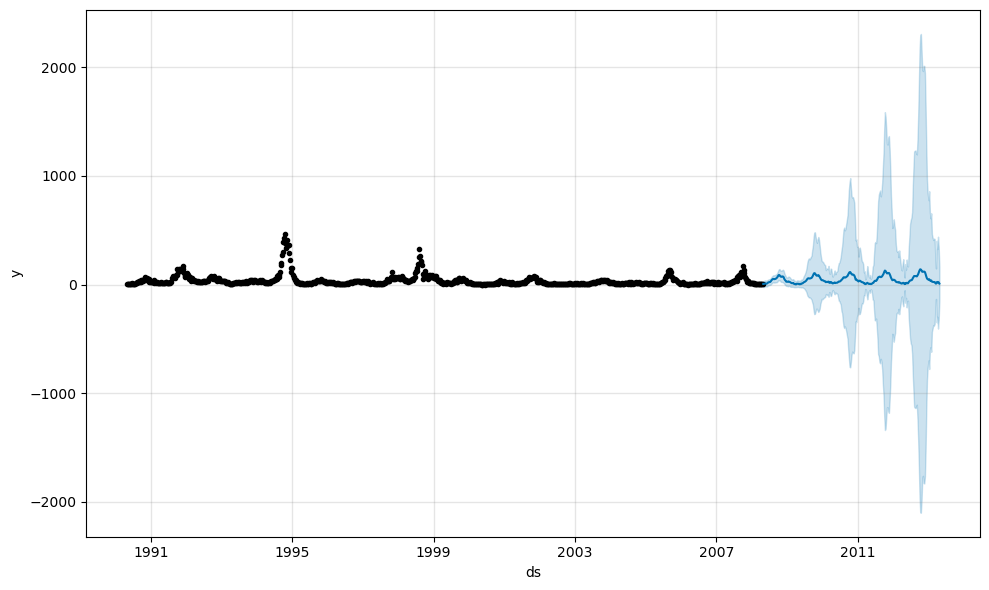

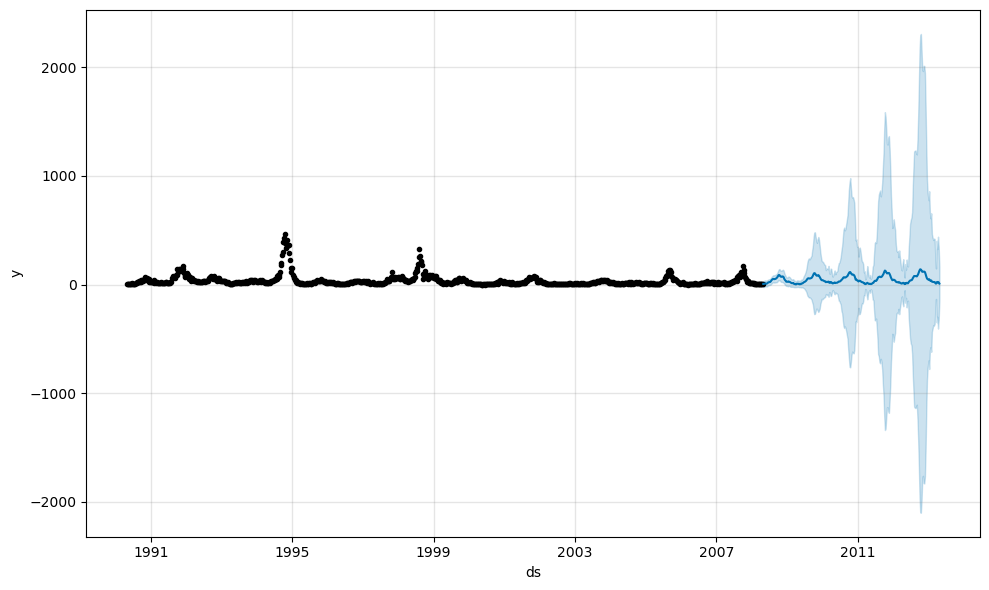

In [34]:
m.plot(forecast_sj)

In [90]:
iq_data = data[data['city'] == 'iq']

In [91]:
iq_data['ndvi_se'] = iq_data['ndvi_se'].fillna(method = 'ffill')
iq_data['ndvi_sw'] = iq_data['ndvi_sw'].fillna(method = 'ffill')
iq_data['ndvi_ne'] = iq_data['ndvi_ne'].fillna(method = 'ffill')
iq_data['ndvi_nw'] = iq_data['ndvi_nw'].fillna(method = 'ffill')

iq_data['reanalysis_air_temp_k'] = iq_data['reanalysis_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_avg_temp_k'] = iq_data['reanalysis_avg_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_dew_point_temp_k'] =iq_data['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_max_air_temp_k'] = iq_data['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_min_air_temp_k'] = iq_data['reanalysis_min_air_temp_k'].fillna(method = 'ffill')
iq_data['reanalysis_specific_humidity_g_per_kg'] = iq_data['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
iq_data['station_min_temp_c'] = iq_data['station_min_temp_c'].fillna(method = 'ffill')


iq_data['avg_reanalysis'] = iq_data[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

iq_data['avg_ndvi'] = iq_data[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [92]:
iq_data = iq_data[['week_start_date','total_cases','avg_reanalysis','reanalysis_specific_humidity_g_per_kg','avg_ndvi']]

In [93]:
iq_data.rename(columns = {'week_start_date':'ds','total_cases':'y'}, inplace=True)

In [106]:
test_df_iq = test_df_main[test_df_main['city']=='iq']
test_df_iq.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
260,iq,2010,26,2010-07-02,0.183783,0.142500,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,307.9,293.7,34.11,92.581429,82.29,17.654286,9.428571,27.440,10.760,33.8,21.5,11.2
261,iq,2010,27,2010-07-09,0.291657,0.272267,0.330700,0.320914,25.30,298.224286,299.464286,294.831429,307.7,292.2,9.10,83.885714,25.30,16.320000,10.157143,27.025,9.625,33.0,21.2,8.9
262,iq,2010,28,2010-07-16,0.208543,0.366457,0.212629,0.255514,62.14,297.955714,298.964286,296.417143,306.4,292.5,61.09,92.057143,62.14,18.030000,9.557143,26.950,10.350,33.4,21.6,22.6
263,iq,2010,29,2010-07-23,0.089286,0.063214,0.122057,0.081957,47.80,295.715714,296.642857,293.638571,306.4,289.3,19.60,88.970000,47.80,15.394286,7.828571,26.900,9.700,33.3,14.2,4.8
264,iq,2010,30,2010-07-30,0.306100,0.327683,0.250086,0.267914,56.30,298.502857,300.000000,293.892857,308.1,290.5,18.93,78.610000,56.30,15.468571,11.771429,27.050,11.850,33.5,16.9,3.0


In [107]:
test_df_iq['ndvi_se'] = test_df_iq['ndvi_se'].fillna(method = 'ffill')
test_df_iq['ndvi_sw'] = test_df_iq['ndvi_sw'].fillna(method = 'ffill')
test_df_iq['ndvi_ne'] = test_df_iq['ndvi_ne'].fillna(method = 'ffill')
test_df_iq['ndvi_nw'] = test_df_iq['ndvi_nw'].fillna(method = 'ffill')

test_df_iq['reanalysis_air_temp_k'] = test_df_iq['reanalysis_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_avg_temp_k'] = test_df_iq['reanalysis_avg_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_dew_point_temp_k'] =test_df_iq['reanalysis_dew_point_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_max_air_temp_k'] = test_df_iq['reanalysis_max_air_temp_k'].fillna(method = 'ffill')
test_df_iq['reanalysis_min_air_temp_k'] = test_df_iq['reanalysis_min_air_temp_k'].fillna(method = 'ffill')


test_df_iq['avg_reanalysis'] = test_df_iq[['reanalysis_air_temp_k','reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
                                    'reanalysis_max_air_temp_k','reanalysis_min_air_temp_k']].mean(axis = 1)

test_df_iq['avg_ndvi'] = test_df_iq[['ndvi_se','ndvi_sw','ndvi_ne','ndvi_nw']].mean(axis = 1)

In [108]:
test_df_iq['reanalysis_specific_humidity_g_per_kg'] = test_df_iq['reanalysis_specific_humidity_g_per_kg'].fillna(method = 'ffill')
test_df_iq['station_min_temp_c'] = test_df_iq['station_min_temp_c'].fillna(method = 'ffill')


In [109]:
test_df_iq = test_df_iq[['week_start_date','avg_reanalysis','reanalysis_specific_humidity_g_per_kg','avg_ndvi']]

In [110]:
test_df_iq.rename(columns = {'week_start_date':'ds'}, inplace=True)
test_df_iq.head()

,ds,avg_reanalysis,reanalysis_specific_humidity_g_per_kg,avg_ndvi
260,2010-07-02,298.916286,17.654286,0.175407
261,2010-07-09,298.484000,16.320000,0.303885
262,2010-07-16,298.447429,18.030000,0.260786
263,2010-07-23,296.339429,15.394286,0.089129
264,2010-07-30,298.199143,15.468571,0.287946


In [111]:
# m_iq = Prophet()
# m_iq.add_regressor('avg_reanalysis')
# m_iq.add_regressor('avg_ndvi')
# m_iq.fit(iq_data)

# # # future = m.make_future_dataframe(periods=10)
# # future['avg_reanalysis'] = future['ds'].apply(weather_temp)
# # future['avg_ndvi'] = future['ds'].apply(weather_condition)

# forecast_iq = m_iq.predict(test_df_iq)
# forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

In [112]:
# forecast_iq.head()

In [113]:
# forecast_iq[forecast_iq['yhat'] == 0].count()

In [115]:

# Set up parameter grid
param_grid = {  
    'changepoint_prior_scale': [0.001, 0.08, 0.5],
    'seasonality_prior_scale': [0.01, 1, 5, 12],
    'seasonality_mode': ['additive', 'multiplicative']
}
# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
# Create a list to store MAPE values for each combination
mapes = [] 
# Use cross validation to evaluate all parameters
for params in all_params:
    # Fit a model using one parameter combination
    m = Prophet(**params)
    m.add_regressor('avg_reanalysis')
    m.add_regressor('reanalysis_specific_humidity_g_per_kg')
    m.add_regressor('avg_ndvi')
    m.fit(iq_data)
    # Cross-validation
    df_cv = cross_validation(m, initial='200 days', period='30 days', horizon = '30 days', parallel="processes")
    # Model performance
    df_p = performance_metrics(df_cv, rolling_window=1)
    # Save model performance metrics
    mapes.append(df_p['mae'].values[0])
    
# Tuning results
tuning_results = pd.DataFrame(all_params)
tuning_results['mae'] = mapes
# Find the best parameters
best_params = all_params[np.argmin(mapes)]
# Fit the model using the best parameters
auto_model = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'], 
                     seasonality_prior_scale=best_params['seasonality_prior_scale'], 
                     seasonality_mode=best_params['seasonality_mode'])
# Fit the model on the training dataset
auto_model.add_regressor('avg_reanalysis')
auto_model.add_regressor('reanalysis_specific_humidity_g_per_kg')
auto_model.add_regressor('avg_ndvi')
auto_model.fit(iq_data)

15:38:06 - cmdstanpy - INFO - Chain [1] start processing
15:38:06 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] start processing
15:38:12 - cmdstanpy - INFO - Chain [1] done processing
15:38:12 - cmdstanpy - INFO - Chain [1] done processing
15:38:12 - cmdstanpy - INFO - Chain [1] done processing
15:38:12 - cmdstanpy - INFO - Chain [1] done processing
15:38:13 - cmdstanpy - INFO - Chain [1] done processing
15:38:13 - cmdstanpy - INFO - Chain [1] done pr

15:38:20 - cmdstanpy - INFO - Chain [1] done processing
15:38:20 - cmdstanpy - INFO - Chain [1] start processing
15:38:20 - cmdstanpy - INFO - Chain [1] done processing
15:38:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:20 - cmdstanpy - INFO - Chain [1] start processing
15:38:20 - cmdstanpy - INFO - Chain [1] start processing
15:38:20 - cmdstanpy - INFO - Chain [1] done processing
15:38:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:20 - cmdstanpy - INFO - Chain [1] start processing
15:38:20 - cmdstanpy - INFO - Chain [1] start processing
15:38:20 - cmdstanpy - INFO - Chain [1] done processing
15:38:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:20 - cmdstanpy - INFO -

15:38:28 - cmdstanpy - INFO - Chain [1] done processing
15:38:28 - cmdstanpy - INFO - Chain [1] done processing
15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] done processing
15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] start processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] start processing
15:38:29 - cmdstanpy - INFO - Chain [1] done processing
15:38:29 - cmdstanpy - INFO - Chain [1] start processing
15:38:29 - cmdstanpy - INFO - Chain [1] 

15:38:48 - cmdstanpy - INFO - Chain [1] start processing
15:38:48 - cmdstanpy - INFO - Chain [1] start processing
15:38:48 - cmdstanpy - INFO - Chain [1] done processing
15:38:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:48 - cmdstanpy - INFO - Chain [1] done processing
15:38:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:48 - cmdstanpy - INFO - Chain [1] start processing
15:38:48 - cmdstanpy - INFO - Chain [1] start processing
15:38:48 - cmdstanpy - INFO - Chain [1] done processing
15:38:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:48 - cmdstanpy - INFO - Chain [1] start processing
15:38:48 - cmdstanpy - INFO - Chain [1] start processing
15:38:48 - cmdstanpy - INFO 

15:38:56 - cmdstanpy - INFO - Chain [1] start processing
15:38:56 - cmdstanpy - INFO - Chain [1] done processing
15:38:56 - cmdstanpy - INFO - Chain [1] done processing
15:38:57 - cmdstanpy - INFO - Chain [1] start processing
15:38:57 - cmdstanpy - INFO - Chain [1] done processing
15:38:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:57 - cmdstanpy - INFO - Chain [1] start processing
15:38:57 - cmdstanpy - INFO - Chain [1] start processing
15:38:57 - cmdstanpy - INFO - Chain [1] start processing
15:38:57 - cmdstanpy - INFO - Chain [1] done processing
15:38:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:38:57 - cmdstanpy - INFO - Chain [1] done processing
15:38:57 - cmdstanpy - INFO - Chain [1] start processing
15:38:57 - cmdstanpy - INFO - Chain [1] done processing
15:38:58 - cmd

15:39:08 - cmdstanpy - INFO - Chain [1] start processing
15:39:08 - cmdstanpy - INFO - Chain [1] start processing
15:39:08 - cmdstanpy - INFO - Chain [1] done processing
15:39:08 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:39:08 - cmdstanpy - INFO - Chain [1] start processing
15:39:08 - cmdstanpy - INFO - Chain [1] done processing
15:39:09 - cmdstanpy - INFO - Chain [1] start processing
15:39:09 - cmdstanpy - INFO - Chain [1] done processing
15:39:09 - cmdstanpy - INFO - Chain [1] start processing
15:39:09 - cmdstanpy - INFO - Chain [1] done processing
15:39:09 - cmdstanpy - INFO - Chain [1] start processing
15:39:09 - cmdstanpy - INFO - Chain [1] done processing
15:39:09 - cmdstanpy - INFO - Chain [1] start processing
15:39:09 - cmdstanpy - INFO - Chain [1] done processing
15:39:10 - cmdstanpy - INFO - Chain [1] start processing
15:39:10 - cmdstanpy - INFO - Chain [1] done processin

15:39:25 - cmdstanpy - INFO - Chain [1] start processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:39:25 - cmdstanpy - INFO - Chain [1] start processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmdstanpy - INFO - Chain [1] start processing
15:39:26 - cmdstanpy - INFO - Chain [1] start processing
15:39:26 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:39:26 - cmdstanpy - INFO - Chain [1] start processing
15:39:26 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmds

15:39:33 - cmdstanpy - INFO - Chain [1] done processing
15:39:33 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] start processing
15:39:34 - cmdstanpy - INFO - Chain [1] start processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] start processing
15:39:34 - cmdstanpy - INFO - Chain [1] start processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:34 - cmdstanpy - INFO - Chain [1] done processing
15:39:35 - cmdstanpy - INFO - Chain [1] start processing
15:39:35 - cmdstanpy - INFO - Chain [1] start processing
15:39:35 - cmdstanpy - INFO - Chain [1] done processing
15:39:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Opti

15:39:41 - cmdstanpy - INFO - Chain [1] done processing
15:39:41 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - INFO - Chain [1] start processing
15:39:42 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:39:42 - cmdstanpy - INFO - Chain [1] start processing
15:39:42 - cmdstanpy - INFO - Chain [1] start processing
15:39:42 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - INFO - Chain [1] start processing
15:39:42 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - INFO - Chain [1] start processing
15:39:42 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - INFO - Chain [1] done processing
15:39:42 - cmdstanpy - INFO - Chain [1] start processing
15:39:43 - cmdstanpy - INFO - Chain [1] done processing


15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - INFO - Chain [1] start processing
15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:40:01 - cmdstanpy - INFO - Chain [1] start processing
15:40:01 - cmdstanpy - INFO - Chain [1] start processing
15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:40:02 - cmdstanpy - INFO - Chain [1] start processing
15:40:02 - cmdstanpy - INFO - Chain [1] start processing
15:40:02 - cmdstanpy - INFO - Chain [1] done processing
15:40:02 - cmdstanpy - ERROR - Chain [1] error: error during processing

15:40:11 - cmdstanpy - INFO - Chain [1] done processing
15:40:11 - cmdstanpy - INFO - Chain [1] start processing
15:40:11 - cmdstanpy - INFO - Chain [1] done processing
15:40:11 - cmdstanpy - INFO - Chain [1] start processing
15:40:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:40:11 - cmdstanpy - INFO - Chain [1] start processing
15:40:11 - cmdstanpy - INFO - Chain [1] done processing
15:40:11 - cmdstanpy - INFO - Chain [1] start processing
15:40:11 - cmdstanpy - INFO - Chain [1] done processing
15:40:12 - cmdstanpy - INFO - Chain [1] done processing
15:40:12 - cmdstanpy - INFO - Chain [1] start processing
15:40:12 - cmdstanpy - INFO - Chain [1] done processing
15:40:12 - cmdstanpy - INFO - Chain [1] start processing
15:40:12 - cmdstanpy - INFO - Chain [1] done processing
15:40:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization termi

15:40:20 - cmdstanpy - INFO - Chain [1] start processing
15:40:20 - cmdstanpy - INFO - Chain [1] done processing
15:40:20 - cmdstanpy - INFO - Chain [1] start processing
15:40:20 - cmdstanpy - INFO - Chain [1] done processing
15:40:20 - cmdstanpy - INFO - Chain [1] done processing
15:40:20 - cmdstanpy - INFO - Chain [1] start processing
15:40:20 - cmdstanpy - INFO - Chain [1] start processing
15:40:20 - cmdstanpy - INFO - Chain [1] start processing
15:40:20 - cmdstanpy - INFO - Chain [1] done processing
15:40:21 - cmdstanpy - INFO - Chain [1] done processing
15:40:21 - cmdstanpy - INFO - Chain [1] done processing
15:40:21 - cmdstanpy - INFO - Chain [1] done processing
15:40:22 - cmdstanpy - INFO - Chain [1] start processing
15:40:22 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
15:40:28 - cmdstanpy - INFO - Chain [1] start processing
15:40:28 - cmdstanpy - INFO - Chain [1] start pro

15:40:35 - cmdstanpy - INFO - Chain [1] done processing
15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] done processing
15:40:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:40:35 - cmdstanpy - INFO - Chain [1] done processing
15:40:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] start processing
15:40:35 - cmdstanpy - INFO - Chain [1] done processing
15:40:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormal

15:40:42 - cmdstanpy - INFO - Chain [1] done processing
15:40:42 - cmdstanpy - INFO - Chain [1] done processing
15:40:42 - cmdstanpy - INFO - Chain [1] start processing
15:40:42 - cmdstanpy - INFO - Chain [1] start processing
15:40:42 - cmdstanpy - INFO - Chain [1] done processing
15:40:42 - cmdstanpy - INFO - Chain [1] done processing
15:40:42 - cmdstanpy - INFO - Chain [1] done processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:43 - cmdstanpy - INFO - Chain [1] done processing
15:40:43 - cmdstanpy - INFO - Chain [1] done processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:43 - cmdstanpy - INFO - Chain [1] done processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:43 - cmdstanpy - INFO - Chain [1] start processing
15:40:43 - cmdstanpy - INFO - Chain [1] done processing
15:40:43 - cmdstanpy - INFO - Chain [1] 

15:41:02 - cmdstanpy - INFO - Chain [1] start processing
15:41:02 - cmdstanpy - INFO - Chain [1] done processing
15:41:02 - cmdstanpy - INFO - Chain [1] done processing
15:41:03 - cmdstanpy - INFO - Chain [1] done processing
15:41:03 - cmdstanpy - INFO - Chain [1] done processing
15:41:03 - cmdstanpy - INFO - Chain [1] start processing
15:41:03 - cmdstanpy - INFO - Chain [1] start processing
15:41:03 - cmdstanpy - INFO - Chain [1] done processing
15:41:03 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:03 - cmdstanpy - INFO - Chain [1] start processing
15:41:04 - cmdstanpy - INFO - Chain [1] start processing
15:41:04 - cmdstanpy - INFO - Chain [1] done processing
15:41:04 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:04 - cmdstanpy - INFO - Chain [1] start processing
15:41:04 - cmd

15:41:10 - cmdstanpy - INFO - Chain [1] done processing
15:41:10 - cmdstanpy - INFO - Chain [1] start processing
15:41:10 - cmdstanpy - INFO - Chain [1] done processing
15:41:10 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] start processing
15:41:11 - cmdstanpy - INFO - Chain [1] done processing
15:41:11 - cmdstanpy - ERROR - Chain [1] error: error dur

15:41:19 - cmdstanpy - INFO - Chain [1] start processing
15:41:19 - cmdstanpy - INFO - Chain [1] done processing
15:41:19 - cmdstanpy - INFO - Chain [1] done processing
15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] done processing
15:41:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] done processing
15:41:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] start processing
15:41:20 - cmdstanpy - INFO - Chain [1] done processing
15:41:20 - cmdstanpy - ERROR - Chain [1] error: error during processin

15:41:38 - cmdstanpy - INFO - Chain [1] done processing
15:41:38 - cmdstanpy - INFO - Chain [1] done processing
15:41:38 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:38 - cmdstanpy - INFO - Chain [1] start processing
15:41:38 - cmdstanpy - INFO - Chain [1] done processing
15:41:39 - cmdstanpy - INFO - Chain [1] start processing
15:41:39 - cmdstanpy - INFO - Chain [1] done processing
15:41:39 - cmdstanpy - INFO - Chain [1] start processing
15:41:39 - cmdstanpy - INFO - Chain [1] start processing
15:41:39 - cmdstanpy - INFO - Chain [1] done processing
15:41:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
15:41:39 - cmdstanpy - INFO - Chain [1] done processing
15:41:39 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally

15:41:45 - cmdstanpy - INFO - Chain [1] done processing
15:41:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:45 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] start processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmdstanpy - INFO - Chain [1] done processing
15:41:46 - cmds

15:41:54 - cmdstanpy - INFO - Chain [1] done processing
15:41:54 - cmdstanpy - INFO - Chain [1] start processing
15:41:54 - cmdstanpy - INFO - Chain [1] done processing
15:41:54 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
15:41:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
15:41:55 - cmdstanpy - INFO - Chain [1] start processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
15:41:55 - cmdstanpy - INFO - Chain [1] done processing
15:41:55 - cmdstanpy - INFO - Chain [1] start processing

15:42:18 - cmdstanpy - INFO - Chain [1] done processing
15:42:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1] done processing
15:42:18 - cmdstanpy - INFO - Chain [1] done processing
15:42:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO - Chain [1] done processing
15:42:18 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:42:18 - cmdstanpy - INFO - Chain [1] start processing
15:42:18 - cmdstanpy - INFO -

15:42:26 - cmdstanpy - INFO - Chain [1] start processing
15:42:26 - cmdstanpy - INFO - Chain [1] start processing
15:42:26 - cmdstanpy - INFO - Chain [1] done processing
15:42:26 - cmdstanpy - INFO - Chain [1] start processing
15:42:26 - cmdstanpy - INFO - Chain [1] done processing
15:42:26 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
15:42:26 - cmdstanpy - INFO - Chain [1] start processing
15:42:27 - cmdstanpy - INFO - Chain [1] start processing
15:42:27 - cmdstanpy - INFO - Chain [1] done processing
15:42:27 - cmdstanpy - INFO - Chain [1] done processing
15:42:27 - cmdstanpy - INFO - Chain [1] done processing
15:42:27 - cmdstanpy - INFO - Chain [1] done processing
15:42:28 - cmdstanpy - INFO - Chain [1] start processing
15:42:28 - cmdstanpy - INFO - Chain [1] start processing
15:42:28 - cmdstanpy - INFO - Chain [1] start processing
15:42:28 - cmdstanpy - INFO - Chain [1] done processin

15:42:36 - cmdstanpy - INFO - Chain [1] done processing
15:42:36 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:37 - cmdstanpy - INFO - Chain [1] start processing
15:42:37 - cmdstanpy - INFO - Chain [1] done processing
15:42:39 - cmdstanpy - INFO - Chain [1] done processing
15:42:40 - cmdstanpy - INFO - Chain [1] s

15:42:53 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] done processing
15:42:54 - cmdstanpy - INFO - Chain [1] start processing
15:42:54 - cmdstanpy - INFO - Chain [1] 

15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:10 - cmdstanpy - INFO - Chain [1] start processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:10 - cmdstanpy - INFO - Chain [1] done processing
15:43:11 - cmdstanpy - INFO - Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] done processing
15:43:11 - cmdstanpy - INFO - Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] done processing
15:43:11 - cmdstanpy - INFO - Chain [1] start processing
15:43:11 - cmdstanpy - INFO - Chain [1] 

15:43:18 - cmdstanpy - INFO - Chain [1] done processing
15:43:18 - cmdstanpy - INFO - Chain [1] start processing
15:43:18 - cmdstanpy - INFO - Chain [1] start processing
15:43:18 - cmdstanpy - INFO - Chain [1] start processing
15:43:18 - cmdstanpy - INFO - Chain [1] done processing
15:43:18 - cmdstanpy - INFO - Chain [1] done processing
15:43:18 - cmdstanpy - INFO - Chain [1] done processing
15:43:19 - cmdstanpy - INFO - Chain [1] done processing
15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] done processing
15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] done processing
15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] start processing
15:43:19 - cmdstanpy - INFO - Chain [1] done processing
15:43:19 - cmdstanpy - INFO - Chain [1]

15:43:34 - cmdstanpy - INFO - Chain [1] start processing
15:43:34 - cmdstanpy - INFO - Chain [1] done processing
15:43:34 - cmdstanpy - INFO - Chain [1] done processing
15:43:34 - cmdstanpy - INFO - Chain [1] start processing
15:43:34 - cmdstanpy - INFO - Chain [1] done processing
15:43:34 - cmdstanpy - INFO - Chain [1] done processing
15:43:34 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] start processing
15:43:35 - cmdstanpy - INFO - Chain [1] done processing
15:43:35 - cmdstanpy - INFO - Chain [1] 

15:43:49 - cmdstanpy - INFO - Chain [1] start processing
15:43:50 - cmdstanpy - INFO - Chain [1] start processing
15:43:50 - cmdstanpy - INFO - Chain [1] start processing
15:43:50 - cmdstanpy - INFO - Chain [1] start processing
15:43:50 - cmdstanpy - INFO - Chain [1] done processing
15:43:50 - cmdstanpy - INFO - Chain [1] done processing
15:43:50 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] done processing
15:43:51 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1] start processing
15:43:52 - cmdstanpy - INFO - Chain [1]

15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] done processing
15:43:59 - cmdstanpy - INFO - Chain [1] start processing
15:44:00 - cmdstanpy - INFO - Chain [1] start processing
15:44:00 - cmdstanpy - INFO - Chain [1] done processing
15:44:00 - cmdstanpy - INFO - Chain [1] 

15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:14 - cmdstanpy - INFO - Chain [1] done processing
15:44:14 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] done processing
15:44:15 - cmdstanpy - INFO - Chain [1] start processing
15:44:15 - cmdstanpy - INFO - Chain [1]

15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] done processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:29 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] start processing
15:44:30 - cmdstanpy - INFO - Chain [1] done processing
15:44:30 - cmdstanpy - INFO - Chain [1] 

15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] done processing
15:44:39 - cmdstanpy - INFO - Chain [1] start processing
15:44:40 - cmdstanpy - INFO - Chain [1] done processing
15:44:40 - cmdstanpy - INFO - Chain [1] 

15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] start processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:56 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] start processing
15:44:57 - cmdstanpy - INFO - Chain [1] done processing
15:44:57 - cmdstanpy - INFO - Chain [1] 

15:45:06 - cmdstanpy - INFO - Chain [1] done processing
15:45:06 - cmdstanpy - INFO - Chain [1] done processing
15:45:07 - cmdstanpy - INFO - Chain [1] start processing
15:45:07 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] start processing
15:45:13 - cmdstanpy - INFO - Chain [1] done processing
15:45:13 - cmdstanpy - INFO - Chain [1] done processing
15:45:13 - cmdstanpy - INFO - Chain [1] done processing
15:45:13 - cmdstanpy - INFO - Chain [1] done pr

15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] start processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:23 - cmdstanpy - INFO - Chain [1] done processing
15:45:24 - cmdstanpy - INFO - Chain [1] start processing
15:45:24 - cmdstanpy - INFO - Chain [1]

15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] start processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:41 - cmdstanpy - INFO - Chain [1] done processing
15:45:42 - cmdstanpy - INFO - Chain [1] start processing
15:45:42 - cmdstanpy - INFO - Chain [1] done processing
15:45:42 - cmdstanpy - INFO - Chain [1] done processing
15:45:42 - cmdstanpy - INFO - Chain [1] 

15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:52 - cmdstanpy - INFO - Chain [1] done processing
15:45:52 - cmdstanpy - INFO - Chain [1] done processing
15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:52 - cmdstanpy - INFO - Chain [1] done processing
15:45:52 - cmdstanpy - INFO - Chain [1] done processing
15:45:52 - cmdstanpy - INFO - Chain [1] done processing
15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:52 - cmdstanpy - INFO - Chain [1] start processing
15:45:52 - cmdstanpy - INFO - Chain [1] done processing
15:45:53 - cmdstanpy - INFO - Chain [1] done processing
15:45:53 - cmdstanpy - INFO - Chain [1] start processing
15:45:53 - cmdstanpy - INFO - Chain [1] start processing
15:45:53 - cmdstanpy - INFO - Chain [1] done processing
15:45:53 - cmdstanpy - INFO - Chain [1] start processing
15:45:53 - cmdstanpy - INFO - Chain [1]

15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] done processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:12 - cmdstanpy - INFO - Chain [1] start processing
15:46:13 - cmdstanpy - INFO - Chain [1] start processing
15:46:13 - cmdstanpy - INFO - Chain [1] done processing
15:46:13 - cmdstanpy - INFO - Chain [1]

15:46:33 - cmdstanpy - INFO - Chain [1] done processing
15:46:33 - cmdstanpy - INFO - Chain [1] start processing
15:46:33 - cmdstanpy - INFO - Chain [1] done processing
15:46:33 - cmdstanpy - INFO - Chain [1] done processing
15:46:33 - cmdstanpy - INFO - Chain [1] start processing
15:46:33 - cmdstanpy - INFO - Chain [1] start processing
15:46:33 - cmdstanpy - INFO - Chain [1] done processing
15:46:34 - cmdstanpy - INFO - Chain [1] done processing
15:46:34 - cmdstanpy - INFO - Chain [1] done processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] done processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] done processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1] start processing
15:46:34 - cmdstanpy - INFO - Chain [1]

15:46:44 - cmdstanpy - INFO - Chain [1] done processing
15:46:44 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] done processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] done processing
15:46:45 - cmdstanpy - INFO - Chain [1] done processing
15:46:45 - cmdstanpy - INFO - Chain [1] done processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:45 - cmdstanpy - INFO - Chain [1] start processing
15:46:46 - cmdstanpy - INFO - Chain [1] start processing
15:46:46 - cmdstanpy - INFO - Chain [1] done processing
15:46:46 - cmdstanpy - INFO - Chain [1] done processing
15:46:46 - cmdstanpy - INFO - Chain [1] done processing
15:46:46 - cmdstanpy - INFO - Chain [1] done processing
15:46:46 - cmdstanpy - INFO - Chain [1] 

15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] done processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:07 - cmdstanpy - INFO - Chain [1] start processing
15:47:08 - cmdstanpy - INFO - Chain [1] start processing
15:47:08 - cmdstanpy - INFO - Chain [1] done processing
15:47:08 - cmdstanpy - INFO - Chain [1] done processing
15:47:08 - cmdstanpy - INFO - Chain [1] start processing
15:47:08 - cmdstanpy - INFO - Chain [1] done processing
15:47:08 - cmdstanpy - INFO - Chain [1] start processing
15:47:08 - cmdstanpy - INFO - Chain [1] 

15:47:25 - cmdstanpy - INFO - Chain [1] done processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] start processing
15:47:26 - cmdstanpy - INFO - Chain [1] done processing
15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:27 - cmdstanpy - INFO - Chain [1] start processing
15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:27 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1] start processing
15:47:28 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1] start processing
15:47:28 - cmdstanpy - INFO - Chain [1] done processing
15:47:28 - cmdstanpy - INFO - Chain [1

15:47:37 - cmdstanpy - INFO - Chain [1] done processing
15:47:37 - cmdstanpy - INFO - Chain [1] done processing
15:47:37 - cmdstanpy - INFO - Chain [1] done processing
15:47:37 - cmdstanpy - INFO - Chain [1] done processing
15:47:37 - cmdstanpy - INFO - Chain [1] start processing
15:47:37 - cmdstanpy - INFO - Chain [1] done processing
15:47:37 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] done processing
15:47:38 - cmdstanpy - INFO - Chain [1] done processing
15:47:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] done processing
15:47:38 - cmdstanpy - INFO - Chain [1] done processing
15:47:38 - cmdstanpy - INFO - Chain [1] start processing
15:47:38 - cmdstanpy - INFO - Chain [1] 

15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] start processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:05 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] start processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:06 - cmdstanpy - INFO - Chain [1] done processing
15:48:07 - cmdstanpy - INFO - Chain [1] start processing
15:48:07 - cmdstanpy - INFO - Chain [1] 

15:48:23 - cmdstanpy - INFO - Chain [1] done processing
15:48:24 - cmdstanpy - INFO - Chain [1] done processing
15:48:24 - cmdstanpy - INFO - Chain [1] start processing
15:48:24 - cmdstanpy - INFO - Chain [1] done processing
15:48:49 - cmdstanpy - INFO - Chain [1] done processing
15:48:50 - cmdstanpy - INFO - Chain [1] done processing
15:48:52 - cmdstanpy - INFO - Chain [1] done processing
15:48:53 - cmdstanpy - INFO - Chain [1] done processing
15:48:54 - cmdstanpy - INFO - Chain [1] start processing
15:48:54 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.
15:49:00 - cmdstanpy - INFO - Chain [1] start processing
15:49:00 - cmdstanpy - INFO - Chain [1] start processing
15:49:00 - cmdstanpy - INFO - Chain [1] start processing
15:49:00 - cmdstanpy - INFO - Chain [1] start processing
15:49:00 - cmdstanpy - INFO - Chain [1] start processing
15:49:00 - cmdstanpy - INFO - Chain [1] start pro

15:49:10 - cmdstanpy - INFO - Chain [1] start processing
15:49:10 - cmdstanpy - INFO - Chain [1] done processing
15:49:10 - cmdstanpy - INFO - Chain [1] done processing
15:49:10 - cmdstanpy - INFO - Chain [1] done processing
15:49:10 - cmdstanpy - INFO - Chain [1] start processing
15:49:10 - cmdstanpy - INFO - Chain [1] start processing
15:49:10 - cmdstanpy - INFO - Chain [1] start processing
15:49:11 - cmdstanpy - INFO - Chain [1] start processing
15:49:11 - cmdstanpy - INFO - Chain [1] start processing
15:49:11 - cmdstanpy - INFO - Chain [1] done processing
15:49:11 - cmdstanpy - INFO - Chain [1] done processing
15:49:11 - cmdstanpy - INFO - Chain [1] start processing
15:49:11 - cmdstanpy - INFO - Chain [1] start processing
15:49:11 - cmdstanpy - INFO - Chain [1] done processing
15:49:11 - cmdstanpy - INFO - Chain [1] start processing
15:49:11 - cmdstanpy - INFO - Chain [1] done processing
15:49:11 - cmdstanpy - INFO - Chain [1] done processing
15:49:11 - cmdstanpy - INFO - Chain [1]

15:49:34 - cmdstanpy - INFO - Chain [1] done processing
15:49:35 - cmdstanpy - INFO - Chain [1] start processing
15:49:35 - cmdstanpy - INFO - Chain [1] start processing
15:49:35 - cmdstanpy - INFO - Chain [1] done processing
15:49:35 - cmdstanpy - INFO - Chain [1] done processing
15:49:35 - cmdstanpy - INFO - Chain [1] start processing
15:49:35 - cmdstanpy - INFO - Chain [1] done processing
15:49:35 - cmdstanpy - INFO - Chain [1] done processing
15:49:35 - cmdstanpy - INFO - Chain [1] start processing
15:49:36 - cmdstanpy - INFO - Chain [1] start processing
15:49:36 - cmdstanpy - INFO - Chain [1] done processing
15:49:36 - cmdstanpy - INFO - Chain [1] start processing
15:49:36 - cmdstanpy - INFO - Chain [1] done processing
15:49:36 - cmdstanpy - INFO - Chain [1] done processing
15:49:36 - cmdstanpy - INFO - Chain [1] start processing
15:49:36 - cmdstanpy - INFO - Chain [1] done processing
15:49:36 - cmdstanpy - INFO - Chain [1] start processing
15:49:36 - cmdstanpy - INFO - Chain [1] 

15:49:52 - cmdstanpy - INFO - Chain [1] start processing
15:49:52 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] start processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:53 - cmdstanpy - INFO - Chain [1] done processing
15:49:54 - cmdstanpy - INFO - Chain [1] done processing
15:49:54 - cmdstanpy - INFO - Chain [1] done processing
15:49:54 - cmdstanpy - INFO - Chain [1] start processing
15:49:54 - cmdstanpy - INFO - Chain [1] start processing
15:49:54 - cmdstanpy - INFO - Chain [1] start processing
15:49:54 - cmdstanpy - INFO - Chain [1] start processing
15:49:54 - cmdstanpy - INFO - Chain [1]

In [116]:
forecast_iq = auto_model.predict(test_df_iq)
forecast_iq[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

,ds,yhat,yhat_lower,yhat_upper
141,2013-03-19,3.814015,-8.705090,16.190044
142,2013-03-26,3.423594,-9.345720,16.262583
143,2013-04-02,3.583740,-8.198600,16.477773
144,2013-04-09,2.537919,-10.333423,13.986798
145,2013-04-16,1.825019,-11.110703,15.384279
146,2013-04-23,2.530012,-9.527985,15.858897
147,2013-04-30,-0.271334,-12.611714,12.697009
148,2013-05-07,1.916140,-10.569670,14.652902
149,2013-05-14,2.331267,-8.863104,15.559983
150,2013-05-21,1.483100,-10.924146,13.912014


In [117]:
forecast_sj.to_csv('forecast_sj_three_feat_1.csv')
forecast_iq.to_csv('forecast_iq_three_feat_1.csv')

In [14]:
# sj_data.info()